# PRABAL GHOSH
## Deep Learning Lab =  Sequence to Sequence (seq2seq) and Attention and Transformer

# English to Spanish Translation

You must submit a notebook with execution traces and perfectly written corresponding to the course on Seq2Seq, Seq2Seq with Attention and Transformer architectures. This notebook will identify at least 5 sections:
- Introduction: presentation of the problem and how to proceed
- Data pre-processing
- Seq2Seq architecture
- Seq2Seq architecture with Attention (specify which attention model you used)
- Transformer-based architecture
- Use of a model from huggingface.co (transfer learning) to address the same problem (optional)
- Conclusion: comparison of approaches and personal remarks

Submit also a pdf version of your notebook

# Some important links for Sequence to Sequence (seq2seq) variable length and Attention and Transformer


## <font color = green> **Data is dowlnloaded from the following link** </font>  
[https://www.manythings.org/anki/](https://www.manythings.org/anki/)(Tab-delimited Bilingual Sentence Pairs)

**The following tutorial is followed to understand the Sequence to Sequence and attention and Transformer, Bert**

- "https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html" (basics+attention part)
- "https://towardsdatascience.com/classic-seq2seq-model-vs-seq2seq-model-with-attention-31527c77b28a"
- "https://wikidocs.net/178419"
- "https://www.jeremyjordan.me/attention/"
- "https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/"
- "https://www.tensorflow.org/text/tutorials/transformer"
- "https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html" (A ten-minute introduction to sequence-to-sequence learning in Keras)

**The following youtube videos are good to understand the concepts on Sequence to Sequence and attention and Transformer, Bert**
- "https://www.youtube.com/watch?v=XfpMkf4rD6E"
- "https://www.youtube.com/watch?v=RRP0czWtOeM&list=PLQflnv_s49v-4aH-xFcTykTpcyWSY4Tww&index=5"
- "https://www.youtube.com/watch?v=7gHqxK1o7MU"
- "https://www.youtube.com/watch?v=rj5V6q6-XUM&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=69"
- "https://www.youtube.com/playlist?list=PLH0lCpFdVeJuqQLyYNBlEfRydl2L-CBb"
- "https://www.youtube.com/playlist?list=PL_iWQOsE6TfVmKkQHucjPAoRtIJYt8a5A"


**Transformer implementation coding references to understand**
- "https://www.youtube.com/watch?v=Xg5JG30bYik&list=PLTl9hO2Oobd97qfWC40gOSU8C0iu0m2l4&index=14"
- "https://www.youtube.com/watch?v=5ToW5Hpi8Qc&list=PLbMO9c_jUD46TAokjFxdyGoWvLWaZ3uCE&index=8"
- "https://pylessons.com/transformers-training"
- "https://www.youtube.com/watch?v=81LeULNc2_c&list=PLyFpZIg7OtNQHbWjyy_QApMOHhqvzS-9o&index=4"
- "https://pylessons.com/transformers-introduction"
- "https://pylessons.com/build-transformer"
- "https://keras.io/examples/nlp/neural_machine_translation_with_transformer/"
- "https://machinelearningmastery.com/building-transformer-models-with-attention-crash-course-build-a-neural-machine-translator-in-12-days/"
- "https://www.scaler.com/topics/keras/neural-machine-translation-model-in-keras/"
- "https://www.kaggle.com/code/sani84/transformers-language-translator-eng-to-french"
- "https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/transformer.ipynb?hl=fr"
- "https://www.tensorflow.org/text/tutorials/transformer?hl=fr"
- "https://nlp.seas.harvard.edu/2018/04/03/attention.html"

- "https://huggingface.co/docs/transformers/tasks/translation"

- "https://www.youtube.com/watch?v=XAR8jnZZuUs"

- "https://www.youtube.com/watch?v=1JvfrvZgi6c"
- "https://github.com/christianversloot/machine-learning-articles/blob/main/introduction-to-transformers-in-machine-learning.md"

-"https://github.com/christianversloot/machine-learning-articles/blob/main/easy-machine-translation-with-machine-learning-and-huggingface-transformers.md"

- "https://huggingface.co/Helsinki-NLP/opus-mt-tc-big-en-es"

## import libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd


In [3]:
import tensorflow as tf
import keras
import unicodedata
import re
import os
import io
import time

In [4]:
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense,Concatenate

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [5]:
import unicodedata
import re
import numpy as np
import pandas as pd
import os
import io
import time

import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Data Preprocessing

The data is available here: http://www.manythings.org/anki/.
They consist of a set of pairs in the following format:

  `hi .`  `hola .`

There are a variety of languages available, English-Spanish data will be used.

The processing of the data will consist of the following steps:

1. Removal of special characters
1. adding a start or end token to each sentence.
1. Creating the vectorizer for each of the two languages

**Limit the number of examples is 10000 for faster processing**


In [48]:
from google.colab import files
uploades = files.upload()

Saving spa.txt to spa (1).txt


In [49]:
import pandas as pd  # Import pandas library for data manipulation
import re  # Import re library for regular expressions
import unicodedata  # Import unicodedata library for handling Unicode characters

# Load dataset from file
# dataset = 'C:/Users/praba\Documents/GitHub/deep_learning_uca_2/spa-eng/spa.txt'
dataset = 'spa.txt'

df = data = pd.read_table(dataset)  # Read data from file into a DataFrame



In [50]:
import pandas as pd  # Import pandas library for data manipulation
import re  # Import re library for regular expressions
import unicodedata  # Import unicodedata library for handling Unicode characters

# Load dataset from file
# dataset = 'C:/Users/praba\Documents/GitHub/deep_learning_uca_2/spa-eng/spa.txt'
# data = pd.read_table(dataset)  # Read data from file into a DataFrame

# Extract source (X) and target (y) sentences from the DataFrame
X = data.iloc[:, 0]  # Extract the first column as source sentences
y = data.iloc[:, 1]  # Extract the second column as target sentences

# Limit the number of examples for faster processing
X = X[:10000]  # Limit the number of source sentences to 10000
y = y[:10000]  # Limit the number of target sentences to 10000

# Define a function to preprocess a sentence
def step1(sent):
    # Function to preprocess a sentence
    def unicode_to_ascii(s):
        # Normalize Unicode characters and remove accents
        return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

    # Convert the sentence to lowercase and remove leading/trailing whitespaces
    sent = unicode_to_ascii(sent.lower().strip())

    # Add spaces between words and punctuation
    sent = re.sub(r"([?.!,¿])", r" \1 ", sent)
    sent = re.sub(r'[" "]+', " ", sent)

    # Replace everything except letters, punctuation, and some special characters with spaces
    sent = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sent)

    # Add <start> and <end> tokens to the sentence
    return '<start> ' + sent.strip() + ' <end>'

# Apply the preprocessing function to each source and target sentence
X_processed = X.apply(step1)  # Preprocess source sentences
y_processed = y.apply(step1)  # Preprocess target sentences

# Print the first few preprocessed sentences to check
print(X_processed.head())
print(y_processed.head())


0     <start> go . <end>
1     <start> go . <end>
2     <start> go . <end>
3     <start> hi . <end>
4    <start> run ! <end>
Name: Go., dtype: object
0      <start> vete . <end>
1      <start> vaya . <end>
2    <start> vayase . <end>
3      <start> hola . <end>
4     <start> corre ! <end>
Name: Ve., dtype: object


In [51]:
# Convert processed English sentences to numpy array
english_sentences = X_processed_array = np.array(X_processed)
# Convert processed Spanish sentences to numpy array
spanish_sentences = y_processed_array = np.array(y_processed)
X_processed_array.shape, y_processed.shape


((10000,), (10000,))

In [52]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_processed_array, y_processed_array, test_size=0.20, random_state=42)


In [53]:
# Search vocabulary and max_length for each language
def voc(lang):
    # a list of sentences in the same language
    lengths = [len(txt.split()) for txt in lang]
    vocab = set([w for txt in lang for w in txt.split()])

    return max(lengths), list(vocab), len(vocab)+2 # for padding and OOV

max_length_spanish, vocab_spanish, vocab_size_spanish = voc(y_processed_array)
max_length_english, vocab_english, vocab_size_english = voc(X_processed_array)

In [54]:
# vocab_english

In [55]:
max_length_spanish,max_length_english

(13, 8)

In [56]:
vocab_size_spanish,vocab_size_english

(4576, 2206)

In [57]:
# Build vectorizer layer
english_vectorizer = layers.TextVectorization(standardize=None, output_mode='int',
                                              vocabulary=vocab_english,
                                              name="English_vect")
# On peut connaitre le vocabulaire par english_vectorizer.get_vocabulary()

# Do the same for spanish
spanish_vectorizer = layers.TextVectorization(standardize=None, output_mode='int',
                                              vocabulary=vocab_spanish,
                                              name="Spanish_vect")

In [58]:
BATCH_SIZE = 32  # Batch size for training or inference
embedding_dim = 100  # Dimensionality of the embedding space
latent_dim = 64  # Dimensionality of the latent space
dropout = 0.2  # Dropout rate,


In [59]:
# spanish_embedded_data = spanish_vectorizer(y_processed_array)
english_embedded_data = english_vectorizer(X_processed_array)
english_embedded_data[1]

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([1280, 1090,  412, 1866,    0,    0,    0,    0])>

In [60]:
# y_processed_array

In [61]:
spanish_teacher_enc  = spanish_vectorizer(y_processed_array) #.numpy() # Teacher
spanish_target_enc = np.zeros_like(spanish_teacher_enc)
spanish_target_enc[:,:-1] = spanish_teacher_enc[:,1:] # To predict
spanish_target_enc.shape


(10000, 13)

# Normal Sequence to Sequence (seq2seq)

<img  src="https://www.jeremyjordan.me/content/images/size/w1600/2023/02/path-length-1-2.png" />



<video controls src="https://lena-voita.github.io/resources/lectures/seq2seq/general/seq2seq_training_with_target.mp4" />  

https://machinelearningmastery.com/define-encoder-decoder-sequence-sequence-model-neural-machine-translation-keras/

##  basic model

**ENCODER**

In [41]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

# Define an input sequence and process it.
encoder_inputs = Input(shape=(None,))
layer_embedding = layers.Embedding(vocab_size_english, embedding_dim)
embedding_layer_final = layer_embedding(encoder_inputs)

encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(embedding_layer_final)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]



**DECODER**

In [42]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.

layer_embedding_decoder = layers.Embedding(vocab_size_spanish, embedding_dim)
x =layer_embedding_decoder(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(x,
                                     initial_state=encoder_states)
decoder_dense = Dense(vocab_size_spanish, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model_encoder_training = Model([encoder_inputs, decoder_inputs], decoder_outputs, name="model_encoder_training")

In [43]:
model_encoder_training.summary()

Model: "model_encoder_training"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 100)            220600    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, None, 100)            457600    ['input_2[0][0]']             
                                                                             

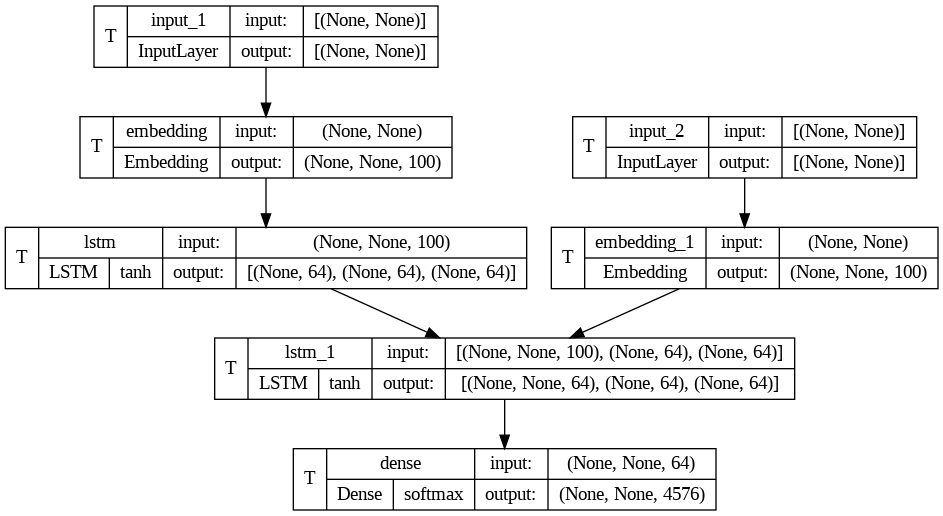

In [44]:
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model

plot_model(model_encoder_training, to_file='model_plot2.png',
    show_shapes=True,
    show_layer_names=True,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True)

In [45]:
# Run training
model_encoder_training.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



In [46]:
# spanish_embedded_data_test = spanish_vectorizer(y_test)
# english_teacher_enc_test = english_vectorizer(X_test)

In [47]:
# model  training
history = model_encoder_training.fit([english_embedded_data, spanish_teacher_enc], spanish_target_enc,
                    validation_split=0.1,
                    epochs=50, batch_size=BATCH_SIZE,
                    verbose=1)

Epoch 1/50
282/282 [==============================] - 14s 33ms/step - loss: 2.8307 - accuracy: 0.6652 - val_loss: 2.0544 - val_accuracy: 0.6944
Epoch 2/50
282/282 [==============================] - 4s 13ms/step - loss: 1.5635 - accuracy: 0.7771 - val_loss: 1.8055 - val_accuracy: 0.7378
Epoch 3/50
282/282 [==============================] - 3s 12ms/step - loss: 1.4424 - accuracy: 0.7848 - val_loss: 1.7069 - val_accuracy: 0.7446
Epoch 4/50
282/282 [==============================] - 3s 10ms/step - loss: 1.3741 - accuracy: 0.7975 - val_loss: 1.6575 - val_accuracy: 0.7597
Epoch 5/50
282/282 [==============================] - 3s 11ms/step - loss: 1.3252 - accuracy: 0.8032 - val_loss: 1.6179 - val_accuracy: 0.7645
Epoch 6/50
282/282 [==============================] - 3s 10ms/step - loss: 1.2871 - accuracy: 0.8071 - val_loss: 1.5935 - val_accuracy: 0.7701
Epoch 7/50
282/282 [==============================] - 4s 13ms/step - loss: 1.2500 - accuracy: 0.8116 - val_loss: 1.5605 - val_accuracy: 0.774

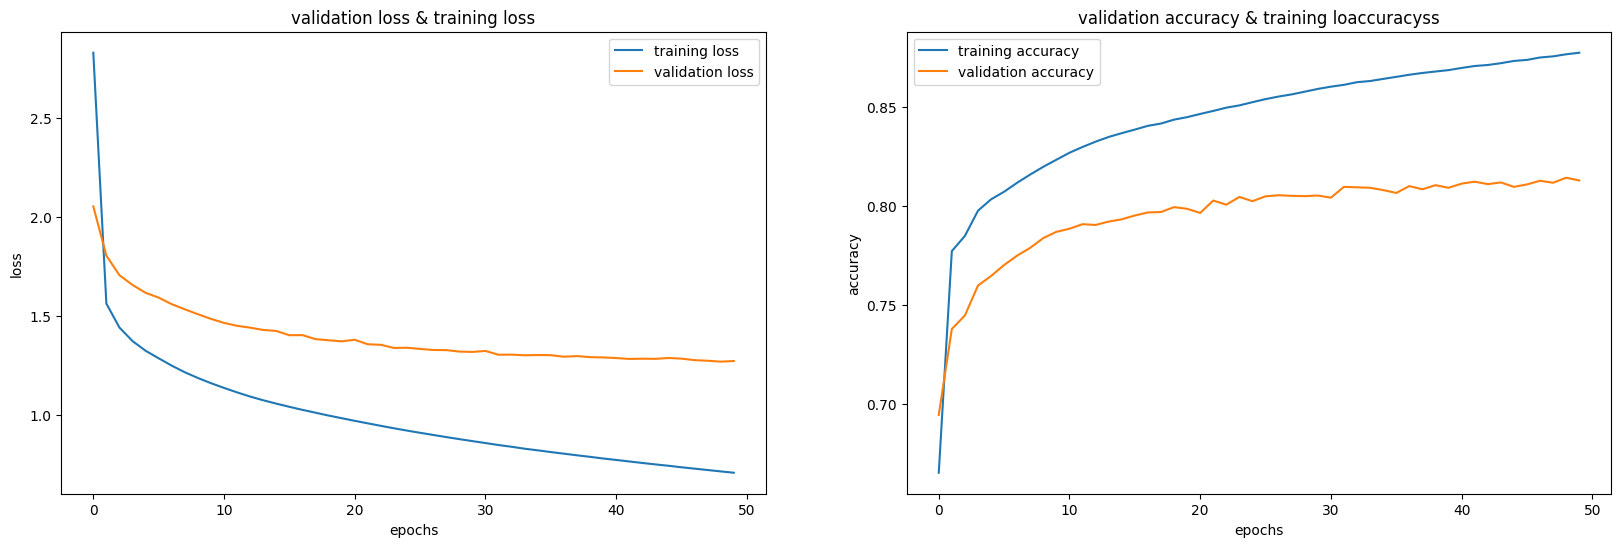

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
# Plot the first subplot  loss)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("validation loss & training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(["training loss", "validation loss"],loc ="upper right");

# Plot the second subplot ( accuracy)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("validation accuracy & training loaccuracyss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
leg = plt.legend(["training accuracy", "validation accuracy"],loc ="upper left");

plt.show()


## Inference

In [49]:
# tmp, outh, outc = model_encoder_training.get_layer("lstm_2").output
# encoder_model = Model(encoder_inputs, [outh, outc])

# encoder_model = Model(encoder_inputs, [outh, outc])
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

layer_embedding_decoder_inf = layer_embedding_decoder(decoder_inputs)
decoder_outputs, state_h, state_c = decoder_lstm(
    layer_embedding_decoder_inf , initial_state=decoder_states_inputs)


decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [50]:
import numpy as np

def decode_sequence(input_sentence):

    input_seq = step1(input_sentence)
    input_seq_transformed = english_vectorizer([input_seq])

    states_value = encoder_model.predict(input_seq_transformed)


    target_seq = np.zeros((1, 1))

    target_seq[0, 0] = vocab_spanish.index('<start>')

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)


        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = list(vocab_spanish)[sampled_token_index]
        decoded_sentence += ' ' + sampled_word


        if (sampled_word == '<end>' or len(decoded_sentence) > max_length_english):
            stop_condition = True


        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        states_value = [h, c]

    return decoded_sentence

In [51]:
for english_sent, spanish_sent in zip(english_sentences[-10:], spanish_sentences[-10:]):
    print("="*50)
    english_sent = english_sent.replace('<start>', '').replace('<end>', '')
    spanish_sent = spanish_sent.replace('<start>', '').replace('<end>', '')
    print("English:", english_sent, "--> Expected Spanish:", spanish_sent)
    decoded_sentence = decode_sequence(english_sent)
    print("Model's translation:", decoded_sentence)


English:  i can t whistle .  --> Expected Spanish:  no se silbar . 
1/1 [==============================] - 0s 18ms/step
Model's translation:  vemos caravana
English:  i caught a cold .  --> Expected Spanish:  me resfrie . 
1/1 [==============================] - 0s 18ms/step
Model's translation:  vacios rellena
English:  i caught a cold .  --> Expected Spanish:  pille un resfriado . 
1/1 [==============================] - 0s 20ms/step
Model's translation:  vacios rellena
English:  i caught a fish !  --> Expected Spanish:  atrape un pez ! 
1/1 [==============================] - 0s 20ms/step
Model's translation:  llevanos
English:  i caught an eel .  --> Expected Spanish:  capture una anguila . 
1/1 [==============================] - 0s 20ms/step
Model's translation:  vacios vacios
English:  i caught an eel .  --> Expected Spanish:  cogi una anguila . 
1/1 [==============================] - 0s 19ms/step
Model's translation:  vacios vacios
English:  i chickened out .  --> Expected Spanish:

# Sequence to Sequence Attention

<img  src="https://lena-voita.github.io/resources/lectures/seq2seq/attention/general_scheme-min.png" />


https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/

## Method -1.  ( Attention layer is directly imported from keras)
**tf.keras.layers.Attention()**

**ENCODER**

In [20]:

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import tensorflow as tf

# Define an input sequence and process it.
# encoder_inputs = Input(shape=(1,), dtype=tf.string, name="spanish_input")
encoder_inputs = Input(shape=(None,), name="english_input")

# encoder_vectorizer = spanish_vectorizer(encoder_inputs)

# enc = layers.Embedding(vocab_size_spanish, embedding_dim, name="sp_embedding")(encoder_vectorizer)

layer_embedding = layers.Embedding(vocab_size_english, embedding_dim)
embedding_layer_final = layer_embedding(encoder_inputs)

encoder = LSTM(latent_dim,  return_sequences=True, return_state=True,
                                   dropout=dropout, recurrent_dropout=dropout, name="encoder")
enc_state_ouput, enc_state_h, enc_state_c = encoder(embedding_layer_final)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [enc_state_h, enc_state_c]


**DECODER**

In [21]:
decoder_inputs = Input(shape=(None,), name="spanish_teacher")
# decoder_inputs = Input(shape=(None,), dtype=tf.int32, name="english_teacher")
layer_embedding_decoder = layers.Embedding(vocab_size_spanish, embedding_dim, name="spanish_embedding")
x =layer_embedding_decoder(decoder_inputs)

# Adding the Attention mechanism

decoder_lstm = layers.LSTM(latent_dim, return_sequences=True, return_state=True,
                           dropout=dropout, recurrent_dropout=dropout, name="Decoder")
decoder_outputs,decoder_state_h, decoder_state_c = decoder_lstm(x, initial_state=encoder_states)

attention_layer = tf.keras.layers.Attention()
attention=attention_layer([decoder_outputs, enc_state_ouput])  # Using the decoder input and encoder output for attention
# decoder_combined_context = layers.concatenate([decoder_outputs,attention], name="Luong_Attention")
decoder_combined_context = Concatenate(axis=-1)([decoder_outputs,attention])

decoder_dense = layers.Dense(vocab_size_spanish, activation='softmax')
# decoder_outputs_final = decoder_dense(attention)
decoder_outputs_final = decoder_dense(decoder_combined_context)


# Define the model
model2 = Model([encoder_inputs, decoder_inputs], decoder_outputs_final)

In [22]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 english_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 spanish_teacher (InputLaye  [(None, None)]               0         []                            
 r)                                                                                               
                                                                                                  
 embedding (Embedding)       (None, None, 100)            220600    ['english_input[0][0]']       
                                                                                                  
 spanish_embedding (Embeddi  (None, None, 100)            457600    ['spanish_teacher[0][0]'] 

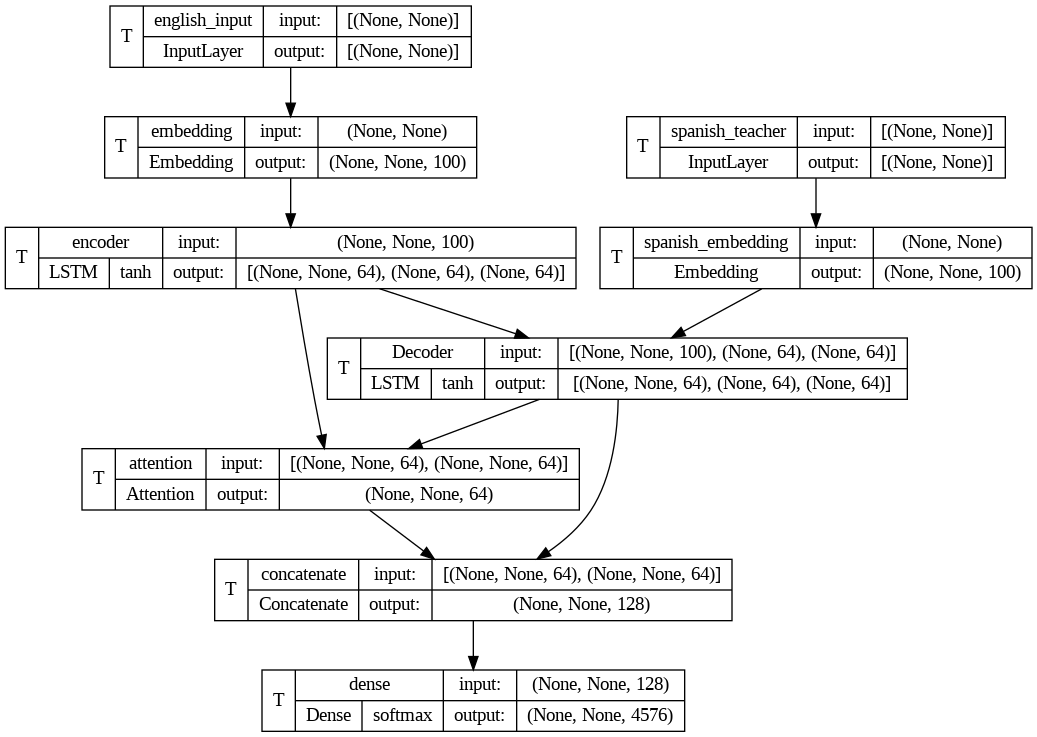

In [23]:
# from tensorflow.keras.utils import plot_model

# plot_model(model2, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)


# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model


plot_model(model2, to_file='model_plot3.png',
    show_shapes=True,
    show_layer_names=True,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True)

In [24]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [25]:



history = model2.fit([english_embedded_data, spanish_teacher_enc], spanish_target_enc,
                    validation_split=0.1,
                    epochs=50, batch_size=BATCH_SIZE,
                    verbose=1)


Epoch 1/50
282/282 [==============================] - 38s 107ms/step - loss: 2.4172 - accuracy: 0.6967 - val_loss: 1.9091 - val_accuracy: 0.7127
Epoch 2/50
282/282 [==============================] - 34s 119ms/step - loss: 1.4948 - accuracy: 0.7838 - val_loss: 1.7249 - val_accuracy: 0.7606
Epoch 3/50
282/282 [==============================] - 31s 108ms/step - loss: 1.3964 - accuracy: 0.7971 - val_loss: 1.6809 - val_accuracy: 0.7645
Epoch 4/50
282/282 [==============================] - 33s 116ms/step - loss: 1.3402 - accuracy: 0.8031 - val_loss: 1.6254 - val_accuracy: 0.7667
Epoch 5/50
282/282 [==============================] - 32s 115ms/step - loss: 1.2939 - accuracy: 0.8082 - val_loss: 1.5841 - val_accuracy: 0.7722
Epoch 6/50
282/282 [==============================] - 31s 111ms/step - loss: 1.2549 - accuracy: 0.8125 - val_loss: 1.5511 - val_accuracy: 0.7767
Epoch 7/50
282/282 [==============================] - 31s 109ms/step - loss: 1.2177 - accuracy: 0.8177 - val_loss: 1.5268 - val_ac

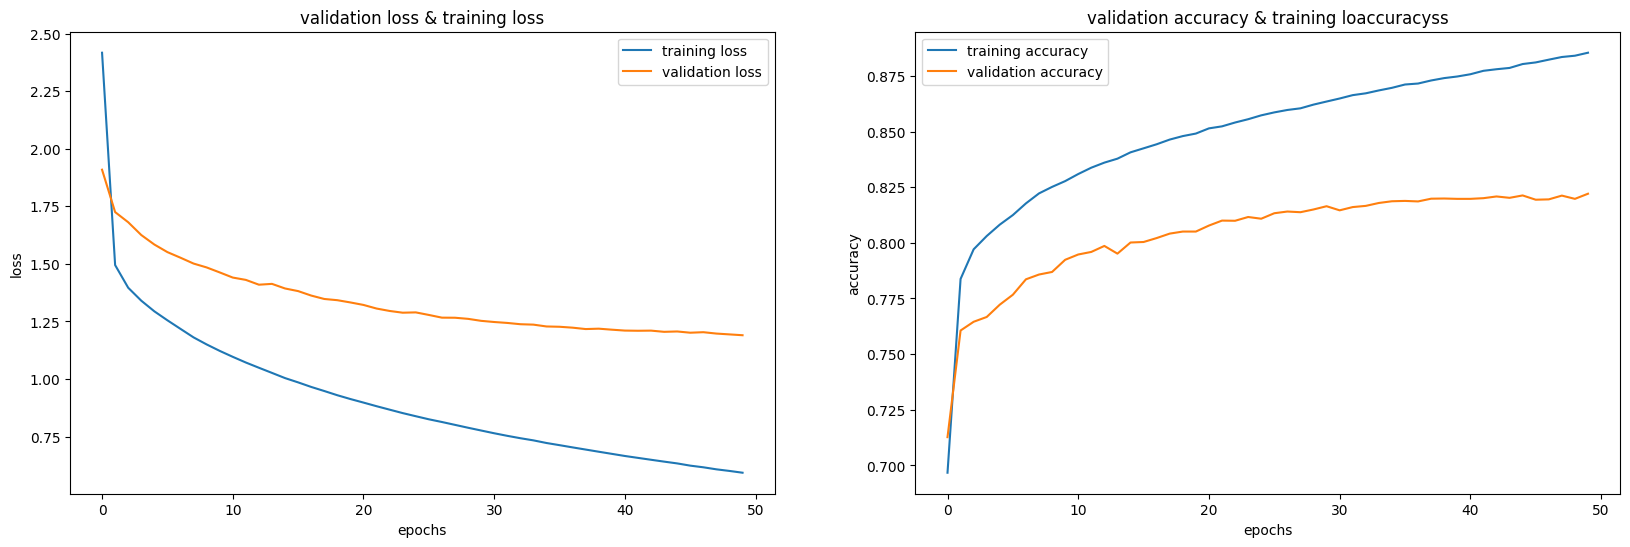

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
# Plot the first subplot  loss)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("validation loss & training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(["training loss", "validation loss"],loc ="upper right");

# Plot the second subplot ( accuracy)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("validation accuracy & training loaccuracyss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
leg = plt.legend(["training accuracy", "validation accuracy"],loc ="upper left");

plt.show()


### INFERENCE

In [74]:
# enc_state_ouput, enc_state_h, enc_state_c

In [29]:
# tmp, outh, outc = model_encoder_training.get_layer("lstm_2").output
# encoder_model = Model(encoder_inputs, [outh, outc])

# encoder_model = Model(encoder_inputs, [outh, outc])
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)

# encoder_model = Model(inputs=encoder_inputs, outputs=[enc_state_ouput, enc_state_h, enc_state_c])


decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

layer_embedding_decoder_inf = layer_embedding_decoder(decoder_inputs)
decoder_outputs, state_h, state_c = decoder_lstm(
    layer_embedding_decoder_inf , initial_state=decoder_states_inputs)

# attention = attention_layer([decoder_outputs, encoder_outputs])
attention = attention_layer([decoder_outputs, enc_state_ouput])


# decoder_combined_context = layers.concatenate([attention, decoder_outputs])

# decoder_combined_context = layers.concatenate(axis=-1)([ decoder_outputs, attention])

decoder_combined_context = Concatenate(axis=-1)([decoder_outputs,attention])

decoder_outputs_final = decoder_dense(decoder_combined_context)


decoder_states = [state_h, state_c]
# decoder_model = Model(
#     [decoder_inputs] + decoder_states_inputs,
#     [decoder_outputs_final] + decoder_states)



In [30]:
import numpy as np

def decode_sequence(input_sentence):

    input_seq = step1(input_sentence)
    input_seq_transformed = english_vectorizer([input_seq])

    states_value = encoder_model.predict(input_seq_transformed)


    target_seq = np.zeros((1, 1))

    target_seq[0, 0] = vocab_spanish.index('<start>')

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)


        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = list(vocab_spanish)[sampled_token_index]
        decoded_sentence += ' ' + sampled_word


        if (sampled_word == '<end>' or len(decoded_sentence) > max_length_english):
            stop_condition = True


        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        states_value = [h, c]

    return decoded_sentence

In [ ]:
# for english_sent, spanish_sent in zip(english_sentences[-10:], spanish_sentences[-10:]):
#     print("="*50)
#     english_sent = english_sent.replace('<start>', '').replace('<end>', '')
#     spanish_sent = spanish_sent.replace('<start>', '').replace('<end>', '')
#     print("English:", english_sent, "--> Expected Spanish:", spanish_sent)
#     decoded_sentence = decode_sequence(english_sent)
#     print("Model's translation:", decoded_sentence)


## Method -2.  ( Attention layer is implemented by using dot products == Luong_Attention)


**Encoder**

In [76]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense

# Define an input sequence and process it.
# encoder_inputs = Input(shape=(None, num_encoder_tokens))
# A_encoder_inputs = Input(shape=(1,),dtype=tf.string, name="english_input")
A_encoder_inputs = Input(shape=(None,), name="english_input")

# A_encoder_vectorizer = spanish_vectorizer(A_encoder_inputs)

# A_enc = layers.Embedding(vocab_size_spanish, embedding_dim, name="en_embedding")(A_encoder_vectorizer)
A_enc = layers.Embedding(vocab_size_english, embedding_dim, name="en_embedding")(A_encoder_inputs)

encoder_outputs, A_enc_state_h, A_enc_state_c = LSTM(latent_dim,  return_sequences=True,return_state=True,
                                   dropout=dropout, recurrent_dropout=dropout, name="encoder")(A_enc)
# We discard `encoder_outputs` and only keep the states.
A_encoder_states = [A_enc_state_h, A_enc_state_c]



**DECODER**

In [77]:
# decoder_inputs = Input(shape=(None,), dtype=tf.int32, name="spanish_teacher")
decoder_inputs = Input(shape=(None,), name="spanish_teacher")

x = layers.Embedding(vocab_size_spanish, embedding_dim
                     ,name="spanish_embedding")(decoder_inputs)
decoder_lstm = layers.LSTM(latent_dim, return_sequences=True, return_state=True,
                           dropout=dropout, recurrent_dropout=dropout, name="Decoder")
decoder_outputs, _, _ = decoder_lstm(x, initial_state=A_encoder_states)


**Attentional part**


In [78]:
attention = layers.dot([decoder_outputs, encoder_outputs], axes=[2,2], name="Attention_score")

**Context vector**


In [79]:
context = layers.dot([attention, encoder_outputs], axes=[2,1], name="Attention_output")
print(context.shape)

(None, None, 64)


**Combine attention with decoder ouput**

In [80]:

decoder_combined_context = layers.concatenate([context, decoder_outputs], name="Luong_Attention")
print(decoder_combined_context.shape)

(None, None, 128)


**Ouput of the model**


In [81]:
ouputs = layers.Dense(vocab_size_spanish, activation='softmax', name="Output")(decoder_combined_context)
print(decoder_outputs.shape)

(None, None, 64)


In [82]:
model3 = Model([A_encoder_inputs, decoder_inputs], ouputs)

In [83]:
model3.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 english_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 spanish_teacher (InputLaye  [(None, None)]               0         []                            
 r)                                                                                               
                                                                                                  
 en_embedding (Embedding)    (None, None, 100)            220600    ['english_input[0][0]']       
                                                                                                  
 spanish_embedding (Embeddi  (None, None, 100)            457600    ['spanish_teacher[0][0]

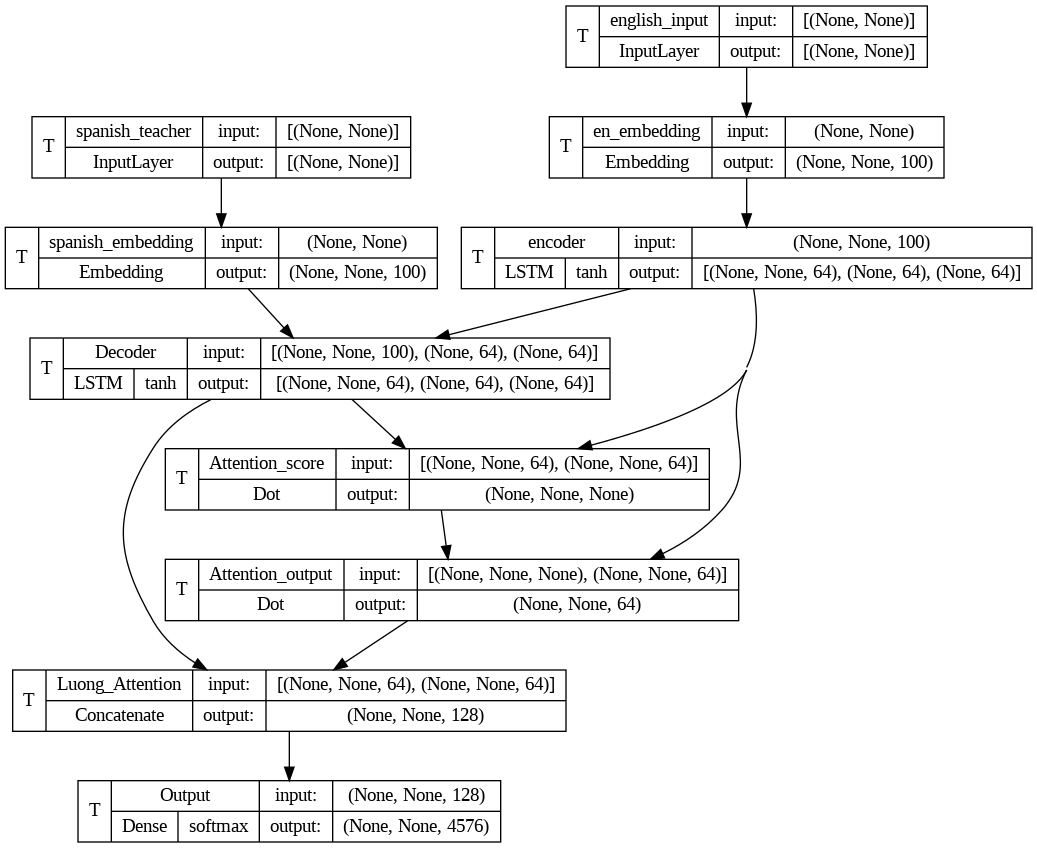

In [84]:
# from tensorflow.keras.utils import plot_model

# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_layer_names=True)

# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model

# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_layer_names=True)

plot_model(model3, to_file='model_plot4.png',
    show_shapes=True,
    show_layer_names=True,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True)

In [85]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [86]:
history = model3.fit([english_embedded_data, spanish_teacher_enc], spanish_target_enc,
                    validation_split=0.1,
                    epochs=50, batch_size=BATCH_SIZE,
                    verbose=1)

Epoch 1/50
282/282 [==============================] - 31s 89ms/step - loss: 2.2734 - accuracy: 0.6721 - val_loss: 1.8314 - val_accuracy: 0.7352
Epoch 2/50
282/282 [==============================] - 22s 78ms/step - loss: 1.4331 - accuracy: 0.7958 - val_loss: 1.6440 - val_accuracy: 0.7678
Epoch 3/50
282/282 [==============================] - 22s 79ms/step - loss: 1.3053 - accuracy: 0.8090 - val_loss: 1.5683 - val_accuracy: 0.7752
Epoch 4/50
282/282 [==============================] - 22s 78ms/step - loss: 1.2162 - accuracy: 0.8180 - val_loss: 1.5031 - val_accuracy: 0.7877
Epoch 5/50
282/282 [==============================] - 21s 76ms/step - loss: 1.1394 - accuracy: 0.8286 - val_loss: 1.4536 - val_accuracy: 0.7912
Epoch 6/50
282/282 [==============================] - 21s 75ms/step - loss: 1.0808 - accuracy: 0.8351 - val_loss: 1.4119 - val_accuracy: 0.7990
Epoch 7/50
282/282 [==============================] - 22s 78ms/step - loss: 1.0322 - accuracy: 0.8406 - val_loss: 1.3770 - val_accuracy:

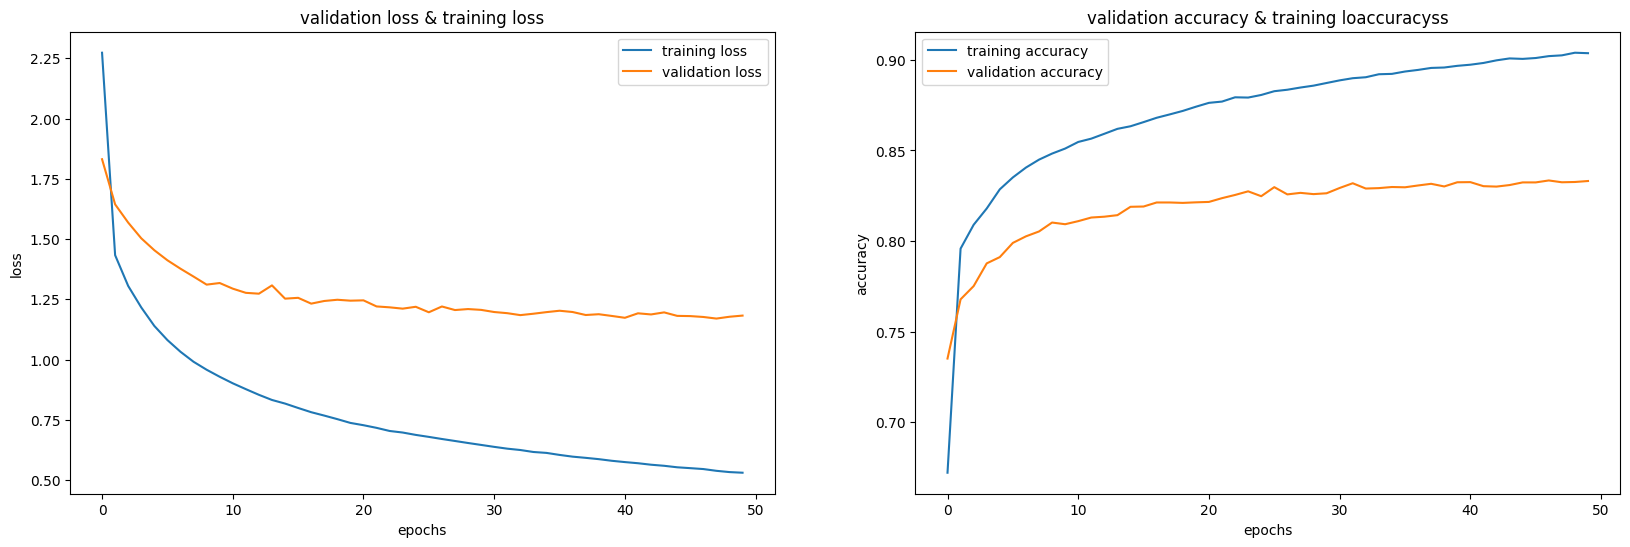

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
# Plot the first subplot  loss)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("validation loss & training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(["training loss", "validation loss"],loc ="upper right");

# Plot the second subplot ( accuracy)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("validation accuracy & training loaccuracyss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
leg = plt.legend(["training accuracy", "validation accuracy"],loc ="upper left");

plt.show()


# Method-1- Transformer(  build transformer from scratch using keras)


Someimportant links for transformer

https://www.youtube.com/watch?v=81LeULNc2_c&list=PLyFpZIg7OtNQHbWjyy_QApMOHhqvzS-9o&index=7

https://machinelearningmastery.com/building-transformer-models-with-attention-crash-course-build-a-neural-machine-translator-in-12-days/

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Input, Dropout, LayerNormalization


In [94]:
# devices = tf.config.experimental.list_physical_devices("GPU")
# for device in devices:
#     tf.config.experimental.set_memory_growth(device=device, enable=True)

In [ ]:
# # df = pd.read_csv("C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\ppp.csv" )
# df = pd.read_csv("C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\ppp.csv" )

# df.columns = ["en", "fr"]
# df.head(10)

In [95]:
import pandas as pd  # Import pandas library for data manipulation
import re  # Import re library for regular expressions
import unicodedata  # Import unicodedata library for handling Unicode characters

# Load dataset from file
# dataset = 'C:/Users/praba\Documents/GitHub/deep_learning_uca_2/spa-eng/spa.txt'
dataset = 'spa.txt'

df = pd.read_table(dataset)  # Read data from file into a DataFrame



In [96]:

df.columns = ["en", "fr","not_needed"]
df.head(10)

,en,fr,not_needed
0,Go.,Vete.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Go.,Vaya.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Go.,Váyase.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Hi.,Hola.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
4,Run!,¡Corre!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
5,Run!,¡Corran!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
6,Run!,¡Huye!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
7,Run!,¡Corra!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
8,Run!,¡Corred!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
9,Run.,Corra.,CC-BY 2.0 (France) Attribution: tatoeba.org #4...


In [97]:
df = df.iloc[:, [0, 1]]

In [98]:
df["en"] = df["en"].str.lower()
df["fr"] = df["fr"].str.lower()

In [99]:
en_data = df["en"].values
fr_data =df["fr"].values

In [100]:
# en_data[:10]

In [101]:
for i in range(fr_data.shape[0]):
    en_data[i] = "sos " + str(en_data[i]) + " eos"
    fr_data[i] = "sos " + str(fr_data[i]) + " eos"

In [102]:
num_words = 10000
tokenizer_en = Tokenizer(num_words=num_words, filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
tokenizer_en.fit_on_texts(en_data)
englist_sentances = tokenizer_en.texts_to_sequences(en_data)

In [103]:
word_index = tokenizer_en.word_index
print(f"Num words in English: {len(word_index)}")

Num words in English: 13996


In [104]:
tokenizer_fr = Tokenizer(num_words=num_words, filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
tokenizer_fr.fit_on_texts(fr_data)
spanish_sentences = tokenizer_fr.texts_to_sequences(fr_data)

word_index_fr = tokenizer_fr.word_index
print(f"Num words in Spanish: {len(word_index_fr)}")

Num words in Spanish: 29208


In [105]:
# word_index_fr

In [106]:
english_sentences = pad_sequences(englist_sentances, maxlen = 7, padding='post', truncating='post')
spanish_sentences = pad_sequences(spanish_sentences, maxlen=7, padding='post', truncating='post')

In [107]:
def get_angles(pos, i, embedding_dim):
    """
    Function to compute the angles for positional encoding.

    Returns the angle computed
    """
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(embedding_dim))
    return pos * angle_rates

In [108]:
def positional_encoding(position, embedding_dim):
    """
    Adds  positional encoding to the Embeddings to be fed to the Transformer model.

    Computes a sin and cos of the angles determined by the get_angles() function
    and adds the value computed to an axis of the embeddings.
    """
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                           np.arange(embedding_dim)[np.newaxis, :], embedding_dim)

    # apply sin to even indices in the array. ie 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array. ie 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

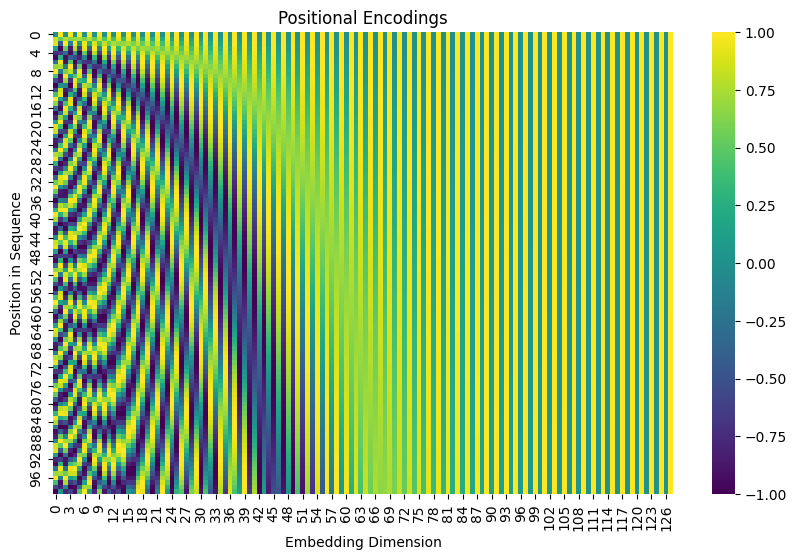

In [109]:
# Generate positional encodings
pos_encodings = positional_encoding(100, 128)

# Visualize the encodings as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pos_encodings[0], cmap='viridis')
plt.xlabel('Embedding Dimension')
plt.ylabel('Position in Sequence')
plt.title('Positional Encodings')
plt.show()

In [110]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [111]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [112]:
def create_masks(inputs, targets):
    enc_padding_mask = create_padding_mask(inputs)
    dec_padding_mask = create_padding_mask(inputs)
    look_ahead_mask = create_look_ahead_mask(tf.shape(targets)[1])
    dec_target_padding_mask = create_padding_mask(targets)
    combine_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
    return enc_padding_mask, combine_mask, dec_padding_mask

In [113]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    dk = tf.cast(tf.shape(k)[-1], dtype=tf.float32)
    scaled_dk = tf.math.sqrt(dk)
    scaled_attention_logits = matmul_qk/scaled_dk
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis = -1)
    output = tf.matmul(attention_weights, v)
    return output, attention_weights

**MultiHeadAttention**

In [114]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, key_dim, num_heads, dropout_rate=0.0):

        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        #  ensure  that the dimension of the embedding can be evenly split across attention heads
        assert key_dim % num_heads == 0
        self.depth = self.key_dim // self.num_heads

        # dense layers to project the input into queries, keys and values
        self.wq = Dense(key_dim)
        self.wk = Dense(key_dim)
        self.wv = Dense(key_dim)

        # dropout layer
        self.dropout = Dropout(dropout_rate)

        # dense layer to project the output of the attention heads
        self.dense = Dense(key_dim)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask=None):

        batch_size = tf.shape(q)[0]

        # Dense on the q, k, v vectors
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        # split the heads
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        # split the queries, keys and values into multiple heads
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # reshape and add Dense layer
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.key_dim))
        output = self.dense(concat_attention)
        output = self.dropout(output)

        return output, attention_weights

**FeedForward**

In [115]:
def FeedForward(embedding_dim, fully_connected_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(fully_connected_dim, activation='relu'),
        tf.keras.layers.Dense(embedding_dim)
    ])
    return model

In [116]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1):
        """
        A single layer of the encoder in a Transformer model.

        Args:
            embedding_dim (int): The dimension of the input embeddings.
            num_heads (int): The number of attention heads in the multi-head attention mechanism.
            fully_connected_dim (int): The dimension of the fully connected feedforward network.
            dropout_rate (float, optional): The dropout rate to be applied. Default is 0.1.
        """
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)

        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)

        # Dropout
        self.dropout = Dropout(dropout_rate)

        # Feedforward network
        self.ffn = FeedForward(embedding_dim, fully_connected_dim)

    def call(self, x, training, mask):
        """
        Forward pass through the encoder layer.

        Args:
            x (tf.Tensor): The input tensor.
            training (bool): Whether the model is in training mode.
            mask: The mask to be applied in multi-head attention.

        Returns:
            tf.Tensor: The output tensor after passing through the encoder layer.
        """

        # Apply multi-head self-attention mechanism to input tensor
        attn_output, _ = self.mha(x, x, x, mask)

        # Apply first layer normalization and add residual connection
        out1 = self.layernorm1(attn_output + x)

        # Apply feedforward network to output of first layer normalization
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout(ffn_output, training=training)

        # Apply second layer normalization and add residual connection
        out2 = self.layernorm2(ffn_output + out1)

        return out2

**Encoder**

In [117]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, maximum_position_encoding, dropout_rate=0.1):

        """
        Args:
            num_layers (int): The number of encoder layers.
            embedding_dim (int): The dimension of the input embeddings.
            num_heads (int): The number of attention heads in the multi-head attention mechanism.
            fully_connected_dim (int): The dimension of the fully connected feedforward network.
            input_vocab_size (int): The size of the input vocabulary.
            maximum_position_encoding (int): The maximum position for positional encoding.
            dropout_rate (float, optional): The dropout rate to be applied. Default is 0.1.
        """

        super(Encoder, self).__init__()

        self.num_layers = num_layers
        self.embedding_dim = embedding_dim

        # Embedding layer
        self.embedding = Embedding(input_vocab_size, embedding_dim)

        # Positional encoding
        self.pos_encoding = positional_encoding(maximum_position_encoding, embedding_dim)

        # Encoder layers
        self.enc_layers = [EncoderLayer(embedding_dim, num_heads, fully_connected_dim, dropout_rate) for _ in range(num_layers)]

        # Dropout layer
        self.dropout = Dropout(dropout_rate)

    def call(self, inputs, training, mask):

        """
        Forward pass through the encoder.

        Args:
            inputs (tf.Tensor): The input sequence tensor.
            training (bool): Whether the model is in training mode.
            mask: The mask to be applied in multi-head attention.

        Returns:
            tf.Tensor: The encoded sequence tensor.
        """

        # Get the sequence length
        seq_len = tf.shape(inputs)[1]

        # Embed the input sequence
        inputs = self.embedding(inputs)

        # Scale the embeddings by sqrt(embedding_dim)
        inputs *= tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))

        # Add positional encodings to the input sequence
        inputs += self.pos_encoding[:, :seq_len, :]

        # Apply dropout to the input sequence
        inputs = self.dropout(inputs, training=training)

        # Pass the input sequence through the encoder layers
        for i in range(self.num_layers):
            inputs = self.enc_layers[i](inputs, training, mask)

        # Return the encoded sequence
        return inputs

In [118]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1):
        """
        Initializes a single decoder layer of the transformer model.

        Args:
            embedding_dim: The dimension of the embedding space.
            num_heads: The number of attention heads to use.
            fully_connected_dim: The dimension of the feedforward network.
            rate: The dropout rate for regularization.
        """
        super(DecoderLayer, self).__init__()

        # Instantiate two instances of MultiHeadAttention.
        self.mha1 = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)
        self.mha2 = MultiHeadAttention(embedding_dim, num_heads, dropout_rate)

        # Instantiate a fully connected feedforward network.
        self.ffn = FeedForward(embedding_dim, fully_connected_dim)

        # Instantiate three layer normalization layers with epsilon=1e-6.
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.layernorm3 = LayerNormalization(epsilon=1e-6)

        # Instantiate a dropout layer for regularization.
        self.dropout3 = Dropout(dropout_rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):

        """
        Forward pass through the decoder layer.

        Args:
            x (tf.Tensor): The input tensor.
            enc_output (tf.Tensor): The output from the encoder layer.
            training (bool): Whether the model is in training mode.
            look_ahead_mask: The mask for look-ahead in multi-head attention.
            padding_mask: The mask for padding in multi-head attention.

        Returns:
            tf.Tensor: The output tensor after passing through the decoder layer.
            tf.Tensor: The attention weights for the first multi-head attention.
            tf.Tensor: The attention weights for the second multi-head attention.
        """

        # Apply the first multi-head attention layer to the query vector x.
        # We pass x as all three inputs to the layer because this is a self-attention layer.
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)

        # Add the original input to the output of the attention layer and apply layer normalization.
        out1 = self.layernorm1(attn1 + x)

        # Apply the second multi-head attention layer to the output from the first layer and the encoder output.
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)

        # Add the output from the first layer to the output of the second layer and apply layer normalization.
        out2 = self.layernorm2(attn2 + out1)

        # Apply the feedforward network to the output of the second layer and apply dropout regularization.
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)

        # Add the output from the second layer to the output of the feedforward network and apply layer normalization.
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

**Decoder**

In [119]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, target_vocab_size, maximum_position_encoding, dropout_rate=0.1):

        """
        The decoder component of a Transformer model.

        Args:
            num_layers (int): The number of decoder layers.
            embedding_dim (int): The dimension of the input embeddings.
            num_heads (int): The number of attention heads to use.
            fully_connected_dim (int): The dimension of the feedforward network.
            target_vocab_size (int): The size of the target vocabulary.
            maximum_position_encoding (int): The maximum position for positional encoding.
            dropout_rate (float, optional): The dropout rate for regularization. Default is 0.1.
        """

        super(Decoder, self).__init__()

        self.num_layers = num_layers
        self.embedding_dim = embedding_dim

        # create layers
        self.embedding = Embedding(target_vocab_size, embedding_dim)
        self.pos_encoding = positional_encoding(maximum_position_encoding, embedding_dim)
        self.dec_layers = [DecoderLayer(embedding_dim, num_heads, fully_connected_dim, dropout_rate=0.1) for _ in range(num_layers)]
        self.dropout = Dropout(dropout_rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):

        """
        Forward pass through the decoder.

        Args:
            x (tf.Tensor): The input sequence tensor.
            enc_output (tf.Tensor): The output from the encoder layer.
            training (bool): Whether the model is in training mode.
            look_ahead_mask: The mask for look-ahead in multi-head attention.
            padding_mask: The mask for padding in multi-head attention.

        Returns:
            tf.Tensor: The decoded sequence tensor.
            dict: Dictionary containing attention weights for each decoder layer.
        """

        seq_len = tf.shape(x)[1]
        attention_weights = {}

        # add embedding and positional encoding
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)

        # apply each layer of the decoder
        for i in range(self.num_layers):
            # pass through decoder layer i
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            # record attention weights for block1 and block2
            attention_weights[f"decoder_layer{i + 1}_block1"] = block1
            attention_weights[f"decoder_layer{i + 1}_block2"] = block2

        return x, attention_weights

In [120]:
class Transformer(tf.keras.Model):

    def __init__(self, num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, target_vocab_size, max_positional_encoding_input, max_positional_encoding_target, dropout_rate=0.1):

        """
        The Transformer model.

        Args:
            num_layers (int): The number of layers in the encoder and decoder.
            embedding_dim (int): The dimension of the input embeddings.
            num_heads (int): The number of attention heads to use.
            fully_connected_dim (int): The dimension of the feedforward network.
            input_vocab_size (int): The size of the input vocabulary.
            target_vocab_size (int): The size of the target vocabulary.
            max_positional_encoding_input (int): The maximum positional encoding for the input.
            max_positional_encoding_target (int): The maximum positional encoding for the target.
            dropout_rate (float, optional): The dropout rate for regularization. Default is 0.1.
        """

        super(Transformer, self).__init__()

        # Initialize the Encoder and Decoder layers
        self.encoder = Encoder(num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, max_positional_encoding_input, dropout_rate)
        self.decoder = Decoder(num_layers, embedding_dim, num_heads, fully_connected_dim, input_vocab_size, max_positional_encoding_target, dropout_rate)

        # Add a final dense layer to make the final prediction
        self.final_layer = tf.keras.layers.Dense(target_vocab_size, activation='softmax')

    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):

        """
        Forward pass through the Transformer.

        Args:
            inp (tf.Tensor): The input sequence tensor.
            tar (tf.Tensor): The target sequence tensor.
            training (bool): Whether the model is in training mode.
            enc_padding_mask: The mask for padding in the encoder.
            look_ahead_mask: The mask for look-ahead in the decoder.
            dec_padding_mask: The mask for padding in the decoder.

        Returns:
            tf.Tensor: The final prediction tensor.
            dict: Dictionary containing attention weights from the decoder.
        """

        # Pass the input sequence through the Encoder
        enc_output = self.encoder(inp, training, enc_padding_mask)

        # Pass the target sequence and the output of the Encoder through the Decoder
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        # Pass the output of the Decoder through the final dense layer to get the final prediction
        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

In [121]:
# Set hyperparameters for the Transformer model
embedding_dim = 256  # dimensionality of the embeddings used for tokens in the input and target sequences
fully_connected_dim = 512  # dimensionality of the hidden layer of the feedforward neural network within the Transformer block
num_layers = 4  # number of Transformer blocks in the encoder and decoder stacks
num_heads = 8  # number of heads in the multi-head attention mechanism
dropout_rate = 0.1  # dropout rate for regularization

# Set vocabulary sizes for input and target sequences
input_vocab_size = len(tokenizer_fr.word_index) + 2  # add 2 for the start and end tokens
target_vocab_size = len(tokenizer_en.word_index) + 2  # add 2 for the start and end tokens

# Set maximum positional encoding values for input and target sequences
max_positional_encoding_input = input_vocab_size  # maximum positional encoding value for input sequence
max_positional_encoding_target = target_vocab_size  # maximum positional encoding value for target sequence

# Set the number of epochs and batch size for training
EPOCHS = 50
batch_size = 512

In [122]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, embedding_dim, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.embedding_dim = tf.cast(embedding_dim, dtype=tf.float32)
        self.warmup_steps = tf.cast(warmup_steps, dtype=tf.float32)

    def __call__(self, step):

        step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.embedding_dim) * tf.math.minimum(arg1, arg2)

# Create an instance of the custom learning rate schedule
learning_rate = CustomSchedule(embedding_dim)

In [123]:
transformer = Transformer(num_layers, embedding_dim, num_heads,
                           fully_connected_dim, input_vocab_size, target_vocab_size,
                           max_positional_encoding_input, max_positional_encoding_target, dropout_rate)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2 = 0.98, epsilon = 1e-9)

# Define the loss object
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

In [124]:

def loss_function(true_values, predictions):
    """
    Calculate the loss value for a given target sequence.

    Args:
        true_values (tf.Tensor): The true target sequence.
        predictions (tf.Tensor): The predicted target sequence.

    Returns:
        float: The loss value for the given target sequence.
    """
    # Create a mask to exclude the padding tokens
    mask = tf.math.logical_not(tf.math.equal(true_values, 0))

    # Compute the loss value using the loss object
    loss_ = loss_object(true_values, predictions)

    # Apply the mask to exclude the padding tokens
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    # Calculate the mean loss value
    return tf.reduce_sum(loss_) / tf.reduce_sum(mask)

def accuracy_function(true_values, predictions):
    """
    Calculate the accuracy for a given target sequence.

    Args:
        true_values (tf.Tensor): The true target sequence.
        predictions (tf.Tensor): The predicted target sequence.

    Returns:
        float: The accuracy value for the given target sequence.
    """
    # Compute the accuracies using the true and predicted target sequences
    accuracies = tf.equal(true_values, tf.argmax(predictions, axis=2))

    # Create a mask to exclude the padding tokens
    mask = tf.math.logical_not(tf.math.equal(true_values, 0))

    # Apply the mask to exclude the padding tokens from the accuracies
    accuracies = tf.math.logical_and(mask, accuracies)
    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)

    # Calculate the mean accuracy value
    return tf.reduce_sum(accuracies) / tf.reduce_sum(mask)

# Define the training metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

In [125]:
train_step_signature = [
    tf.TensorSpec(shape=(batch_size, 30), dtype=tf.int64),
    tf.TensorSpec(shape=(batch_size,30), dtype=tf.int64),
]

In [126]:
@tf.function()
def train_step(encoder_input, target):
    """
    Function to perform a single training step.

    Args:
    encoder_input (tf.Tensor): The input tensor for the encoder.
    target (tf.Tensor): The target tensor for the decoder.

    Returns:
    None.
    """

    # Slice the target tensor to get the input for the decoder
    decoder_input = target[:, :-1]

    # Slice the target tensor to get the expected output of the decoder
    expected_output = target[:, 1:]

    # Create masks for the encoder input, decoder input and the padding
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, decoder_input)

    # Perform a forward pass through the model
    with tf.GradientTape() as tape:
        predictions, _ = transformer(encoder_input, decoder_input, True, enc_padding_mask, combined_mask, dec_padding_mask)

        # Calculate the loss between the predicted output and the expected output
        loss = loss_function(expected_output, predictions)

    # Calculate gradients and update the model parameters
    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    # Update the training loss and accuracy metrics
    train_loss(loss)
    train_accuracy(expected_output, predictions)

In [127]:
EPOCHS = 20

In [128]:
# for epoch in range(0, EPOCHS+1):
for epoch in range(0, EPOCHS+1):

    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    current_batch_index = 0

    # iterate through the dataset in batches of batch_size
    for i in range(int(len(english_sentences)/batch_size)):
        # get the input and target batch
        input_batch = tf.convert_to_tensor(np.array(english_sentences[current_batch_index:current_batch_index+batch_size]),dtype=tf.int64)
        target_batch = tf.convert_to_tensor(np.array(spanish_sentences[current_batch_index:current_batch_index+batch_size]),dtype=tf.int64)

        current_batch_index = current_batch_index + batch_size
        # call the train_step function to train the model using the current batch
        train_step(input_batch, target_batch)

    # print the epoch loss and accuracy after iterating through the dataset
    print (f'Epoch {epoch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

Epoch 0 Loss 8.5504 Accuracy 0.0750
Epoch 1 Loss 6.1008 Accuracy 0.2019
Epoch 2 Loss 4.8176 Accuracy 0.3061
Epoch 3 Loss 4.0328 Accuracy 0.3657
Epoch 4 Loss 3.4182 Accuracy 0.4326
Epoch 5 Loss 2.8023 Accuracy 0.5133
Epoch 6 Loss 2.3108 Accuracy 0.5828
Epoch 7 Loss 1.9625 Accuracy 0.6289
Epoch 8 Loss 1.7163 Accuracy 0.6597
Epoch 9 Loss 1.5517 Accuracy 0.6797
Epoch 10 Loss 1.4203 Accuracy 0.6968
Epoch 11 Loss 1.3113 Accuracy 0.7125
Epoch 12 Loss 1.2355 Accuracy 0.7229
Epoch 13 Loss 1.1699 Accuracy 0.7315
Epoch 14 Loss 1.1298 Accuracy 0.7370
Epoch 15 Loss 1.0670 Accuracy 0.7472
Epoch 16 Loss 1.0007 Accuracy 0.7582
Epoch 17 Loss 0.9419 Accuracy 0.7684
Epoch 18 Loss 0.8918 Accuracy 0.7771
Epoch 19 Loss 0.8425 Accuracy 0.7866
Epoch 20 Loss 0.7987 Accuracy 0.7944


In [129]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  9586176   
                                                                 
 decoder (Decoder)           multiple                  10640896  
                                                                 
 dense_67 (Dense)            multiple                  3597486   
                                                                 
Total params: 23824558 (90.88 MB)
Trainable params: 23824558 (90.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
# save model
# save tokenizer
transformer.save("transformer")

In [131]:
# transformer.load_weights("C:\\Users\\praba\\Downloads\\transformer\\variables\\variables")

In [132]:
transformer.load_weights("transformer/variables/variables")


In [133]:
# .data-00000-of-00001

In [134]:
# Converting the input sequence to a tensor
text = "hi how are you"
text = "sos " + text.lower() + " eos"
inp_seq = pad_sequences(tokenizer_en.texts_to_sequences([text]), maxlen=10, padding='post')
out_seq = tf.convert_to_tensor([[tokenizer_fr.word_index["sos"]]])
# Creating a mask for the input sequence
enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp_seq, out_seq)
# # Creating a mask for the output sequence
output_tokens = []
# # Looping until the maximum length of the output sequence is reached or the <end> token is generated
for i in range(100):
    # Calling the Transformer model on the input and output sequences and masks
    output, attn_weights = transformer(inp_seq, out_seq, False, enc_padding_mask, combined_mask, dec_padding_mask)
    # Getting the last token from the output sequence
    last_token = output[:, -1:, :]
    # Getting the token with the highest probability from the last token
    predicted_token = tf.cast(tf.argmax(last_token, axis=-1), tf.int32)
    # Checking if the predicted token is the <end> token
    if predicted_token == tokenizer_fr.word_index["eos"]:
        break
    # Appending the predicted token to the output tokens list
    output_tokens.append(predicted_token[0][0].numpy())
    # Concatenating the predicted token to the output sequence
    out_seq = tf.concat([out_seq, predicted_token], axis=-1)
    # Updating the mask for the output sequence
    decoder_padding_mask, look_ahead_mask = create_padding_mask(out_seq), create_look_ahead_mask(tf.shape(out_seq)[1])
    combined_mask = tf.maximum(decoder_padding_mask, look_ahead_mask)
# Converting the output tokens list to a tensor
output_tokens = tf.convert_to_tensor([output_tokens])
# Detokenizing and decoding the output tokens to get the translation
# translation = tokenizer_fr.sequences_to_texts(output_tokens)[0]

In [135]:
tokenizer_fr.sequences_to_texts(output_tokens.numpy())

['hola ¿cómo estás']

In [136]:
tokenizer_en.sequences_to_texts(inp_seq)

['sos hi how are you eos']

# Method-2- Transformer(  import transformer from keras-nlp)

https://keras.io/guides/keras_nlp/transformer_pretraining/

https://www.youtube.com/watch?v=9t1Lr4luGqk&list=PLyFpZIg7OtNQHbWjyy_QApMOHhqvzS-9o&index=4&t=449s

## preprocessing

In [31]:
dataset = 'spa.txt'

data = pd.read_table(dataset)  # Read data from file into a DataFrame


In [32]:
data.columns = ["en", "sp","not_needed"]
# data.head(5)

In [33]:
df = data.iloc[:10000, [0, 1]]
# df =data
# df

In [34]:
import re
from unicodedata import normalize

# Function to clean text by removing non-alphabetic characters and normalizing to lowercase
def clean_text(text):
    text = normalize('NFD', text.lower())
    text = re.sub('[^A-Za-z ]+', '', text)
    return text

# Function to clean and prepare text for sequence processing, adding start and end tokens
def clean_and_prepare_text(text):
    text = '[start] ' + clean_text(text) + ' [end]'
    return text

# Apply cleaning and preparation functions to English and Spanish columns in DataFrame
df['en'] = df['en'].apply(lambda row: clean_text(row))
df['sp'] = df['sp'].apply(lambda row: clean_and_prepare_text(row))

# Display the updated DataFrame
df.head()


,en,sp
0,go,[start] vete [end]
1,go,[start] vaya [end]
2,go,[start] vayase [end]
3,hi,[start] hola [end]
4,run,[start] corre [end]


In [35]:
# Extract English and Spanish sentences from DataFrame columns
en = df['en']
sp = df['sp']

# Calculate maximum lengths of English and Spanish phrases
en_max_len = max(len(line.split()) for line in en)
sp_max_len = max(len(line.split()) for line in sp)

# Determine sequence length as the maximum of English and Spanish phrase lengths
sequence_len = max(en_max_len, sp_max_len)

# Print out the maximum phrase lengths and the determined sequence length
print(f'Max phrase length (English): {en_max_len}')
print(f'Max phrase length (Spanish): {sp_max_len}')
print(f'Sequence length: {sequence_len}')


Max phrase length (English): 5
Max phrase length (Spanish): 11
Sequence length: 11


In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize English sentences
en_tokenizer = Tokenizer()
en_tokenizer.fit_on_texts(en)
en_sequences = en_tokenizer.texts_to_sequences(en)
en_x = pad_sequences(en_sequences, maxlen=sequence_len, padding='post')

# Tokenize Spanish sentences
# Set custom filters to include special characters like apostrophe (') in words
sp_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@\\^_`{|}~\t\n')
sp_tokenizer.fit_on_texts(sp)
sp_sequences = sp_tokenizer.texts_to_sequences(sp)
# Pad Spanish sequences with an extra token to handle the decoder input
sp_y = pad_sequences(sp_sequences, maxlen=sequence_len + 1, padding='post')


In [37]:
# Calculate vocabulary sizes for English and Spanish using tokenizers
en_vocab_size = len(en_tokenizer.word_index) + 1
sp_vocab_size = len(sp_tokenizer.word_index) + 1

# Print out the vocabulary sizes for English and Spanish
print(f'Vocabulary size (English): {en_vocab_size}')
print(f'Vocabulary size (Spanish): {sp_vocab_size}')


Vocabulary size (English): 2241
Vocabulary size (Spanish): 4570


Finally, create the features and the labels the model will be trained with. The features are the padded English sequences and the padded spanish sequences minus the [end] tokens. The labels are the padded spanish sequences minus the [start] tokens. Package the features in a dictionary so they can be input to a model that accepts multiple inputs.

In [38]:
# Define inputs for the model, consisting of encoder input (English sequences) and decoder input (Spanish sequences without the last token)
inputs = { 'encoder_input': en_x, 'decoder_input': sp_y[:, :-1] }

# Define outputs for the model, consisting of decoder output (Spanish sequences without the first token)
outputs = sp_y[:, 1:]


## Build and train a model

Now use Keras's functional API to define a model that includes a transformer encoder and a transformer decoder. The model accepts two inputs: padded English sequences for the encoder, and padded Spanish sequences for the decoder. The output from the decoder is fed to a softmax output layer for classification.

In [39]:
!pip install keras_nlp



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.5 MB/s eta 0:00:00


In [40]:
import keras_nlp
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras_nlp.layers import TokenAndPositionEmbedding, TransformerEncoder
from keras_nlp.layers import TransformerDecoder
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
# from transformer_layers import TokenAndPositionEmbedding, TransformerEncoder, TransformerDecoder


Using TensorFlow backend


In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras_nlp.layers import TokenAndPositionEmbedding, TransformerEncoder
from keras_nlp.layers import TransformerDecoder

np.random.seed(42)
tf.random.set_seed(42)

num_heads = 8
embed_dim = 256

encoder_input = Input(shape=(None,), dtype='int64', name='encoder_input')
x = TokenAndPositionEmbedding(en_vocab_size, sequence_len, embed_dim)(encoder_input)
encoder_output = TransformerEncoder(embed_dim, num_heads)(x)
encoded_seq_input = Input(shape=(None, embed_dim))

decoder_input = Input(shape=(None,), dtype='int64', name='decoder_input')
x = TokenAndPositionEmbedding(sp_vocab_size, sequence_len, embed_dim, mask_zero=True)(decoder_input)
x = TransformerDecoder(embed_dim, num_heads)(x, encoded_seq_input)
x = Dropout(0.4)(x)

decoder_output = Dense(sp_vocab_size, activation='softmax')(x)
decoder = Model([decoder_input, encoded_seq_input], decoder_output)
decoder_output = decoder([decoder_input, encoder_output])

model = Model([encoder_input, decoder_input], decoder_output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=120)

Model: "model_3"
________________________________________________________________________________________________________________________
 Layer (type)                       Output Shape                        Param #     Connected to                        
 encoder_input (InputLayer)         [(None, None)]                      0           []                                  
                                                                                                                        
 token_and_position_embedding (Tok  (None, None, 256)                   576512      ['encoder_input[0][0]']             
 enAndPositionEmbedding)                                                                                                
                                                                                                                        
 decoder_input (InputLayer)         [(None, None)]                      0           []                                  
               

In [42]:


hist = model.fit(inputs, outputs, epochs=50, validation_split=0.2)



Epoch 1/50
250/250 [==============================] - 77s 245ms/step - loss: 3.7326 - accuracy: 0.4856 - val_loss: 3.3995 - val_accuracy: 0.5160
Epoch 2/50
250/250 [==============================] - 49s 198ms/step - loss: 2.6116 - accuracy: 0.5862 - val_loss: 2.9868 - val_accuracy: 0.5580
Epoch 3/50
250/250 [==============================] - 48s 192ms/step - loss: 2.0021 - accuracy: 0.6507 - val_loss: 2.7544 - val_accuracy: 0.5935
Epoch 4/50
250/250 [==============================] - 72s 287ms/step - loss: 1.5614 - accuracy: 0.7014 - val_loss: 2.6488 - val_accuracy: 0.6152
Epoch 5/50
250/250 [==============================] - 55s 220ms/step - loss: 1.2461 - accuracy: 0.7386 - val_loss: 2.6058 - val_accuracy: 0.6337
Epoch 6/50
250/250 [==============================] - 60s 239ms/step - loss: 1.0163 - accuracy: 0.7705 - val_loss: 2.6307 - val_accuracy: 0.6325
Epoch 7/50
250/250 [==============================] - 74s 298ms/step - loss: 0.8420 - accuracy: 0.8000 - val_loss: 2.6786 - val_ac

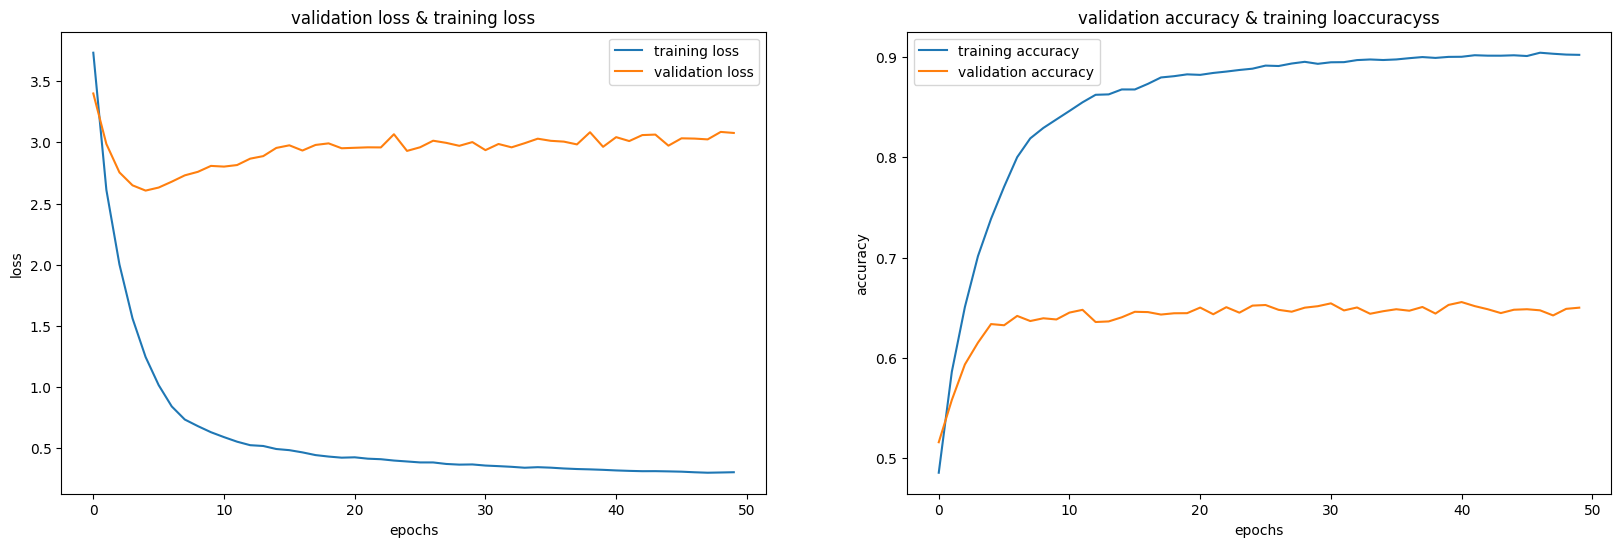

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
# Plot the first subplot  loss)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("validation loss & training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(["training loss", "validation loss"],loc ="upper right");

# Plot the second subplot ( accuracy)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("validation accuracy & training loaccuracyss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
leg = plt.legend(["training accuracy", "validation accuracy"],loc ="upper left");

plt.show()


## Use the model to translate text

In [44]:
def translate_text(text, model, en_tokenizer, sp_tokenizer, sp_index_lookup, sequence_len):
    # Tokenize input text
    input_sequence = en_tokenizer.texts_to_sequences([text])
    # Pad input sequence
    padded_input_sequence = pad_sequences(input_sequence, maxlen=sequence_len, padding='post')
    # Initialize decoded text with start token
    decoded_text = '[start]'

    # Iterate over sequence length
    for i in range(sequence_len):
        # Tokenize decoded text
        target_sequence = sp_tokenizer.texts_to_sequences([decoded_text])
        # Pad decoded text sequence
        padded_target_sequence = pad_sequences(target_sequence, maxlen=sequence_len, padding='post')[:, :-1]

        # Generate prediction using the model
        prediction = model([padded_input_sequence, padded_target_sequence])

        # Get index of highest probability token
        idx = np.argmax(prediction[0, i, :]) - 1
        # Lookup token in index
        token = sp_index_lookup[idx]
        # Append token to decoded text
        decoded_text += ' ' + token

        # Break loop if end token is predicted
        if token == '[end]':
            break

    # Remove start and end tokens from decoded text
    return decoded_text[8:-6]  # Remove [start] and [end] tokens

# Create a dictionary to look up tokens from their index
sp_vocab = sp_tokenizer.word_index
sp_index_lookup = dict(zip(range(len(sp_vocab)), sp_vocab))
# Select a subset of English texts for translation
texts = en[40000:40010].values

# Iterate over selected English texts and translate them
for text in texts:
    translated = translate_text(text, model, en_tokenizer, sp_tokenizer, sp_index_lookup, sequence_len)
    print(f'{text} => {translated}')


In [45]:
# Translate the input text using the translate_text function
translated_text = translate_text('hi how are you', model, en_tokenizer, sp_tokenizer, sp_index_lookup, sequence_len)
print(translated_text)


hola que estas


**Perfectly translating**

# Method-3- HuggingFace Transformer

https://huggingface.co/Helsinki-NLP/opus-mt-tc-big-en-es

In [46]:
from transformers import pipeline

# Init translator
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-tc-big-en-es")

# Translate text
text = "Hello! How are you doing today?"
translation = translator(text)

# Print translation
print(translation)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/466M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/804k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/824k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'Hola, ¿cómo estás hoy?'}]


In [47]:
# Translate text
text = "Hi, I am a student"
translation = translator(text)

# Print translation
print(translation)

[{'translation_text': 'Hola, soy estudiante'}]


# Normal seq2seq is performing suboptimally with just 10,000 data points. Seq2Seq with attention yields slightly better prediction accuracy. However, the Transformer model, built from scratch and trained on the entire dataset, excels in translating English to Spanish with remarkable proficiency. Also the Haggingface transformer and the transformer using keras-nlp is working fine.